# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [11]:
import logging

import numpy as np
import pandas as pd

import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import core.plotting.test.test_plots as cptetepl
import core.plotting.correlation as cplocorr

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

In [5]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-ecc51d7b-8256-4242-8c6d-f1212879d908.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask443_Unit_test_plot_heatmap_from_coreplottingcorrelation.py'
  hash='5b4261208'
  # Last commits:
    * 5b4261208 Samarth KaPatel Update Signing_up_for_Sorrentum.md (#436)                         (    3 days ago) Fri Jul 21 16:11:25 2023  (HEAD -> SorrTask443_Unit_test_plot_heatmap_from_coreplottingcorrelation.py, origin/master, origin/HEAD, master)
    * 624287884 dchoi127 PR for SorrTask395_Unit_test_plotting_galler

# Plots

## `plot_histograms_and_lagged_scatterplot()`

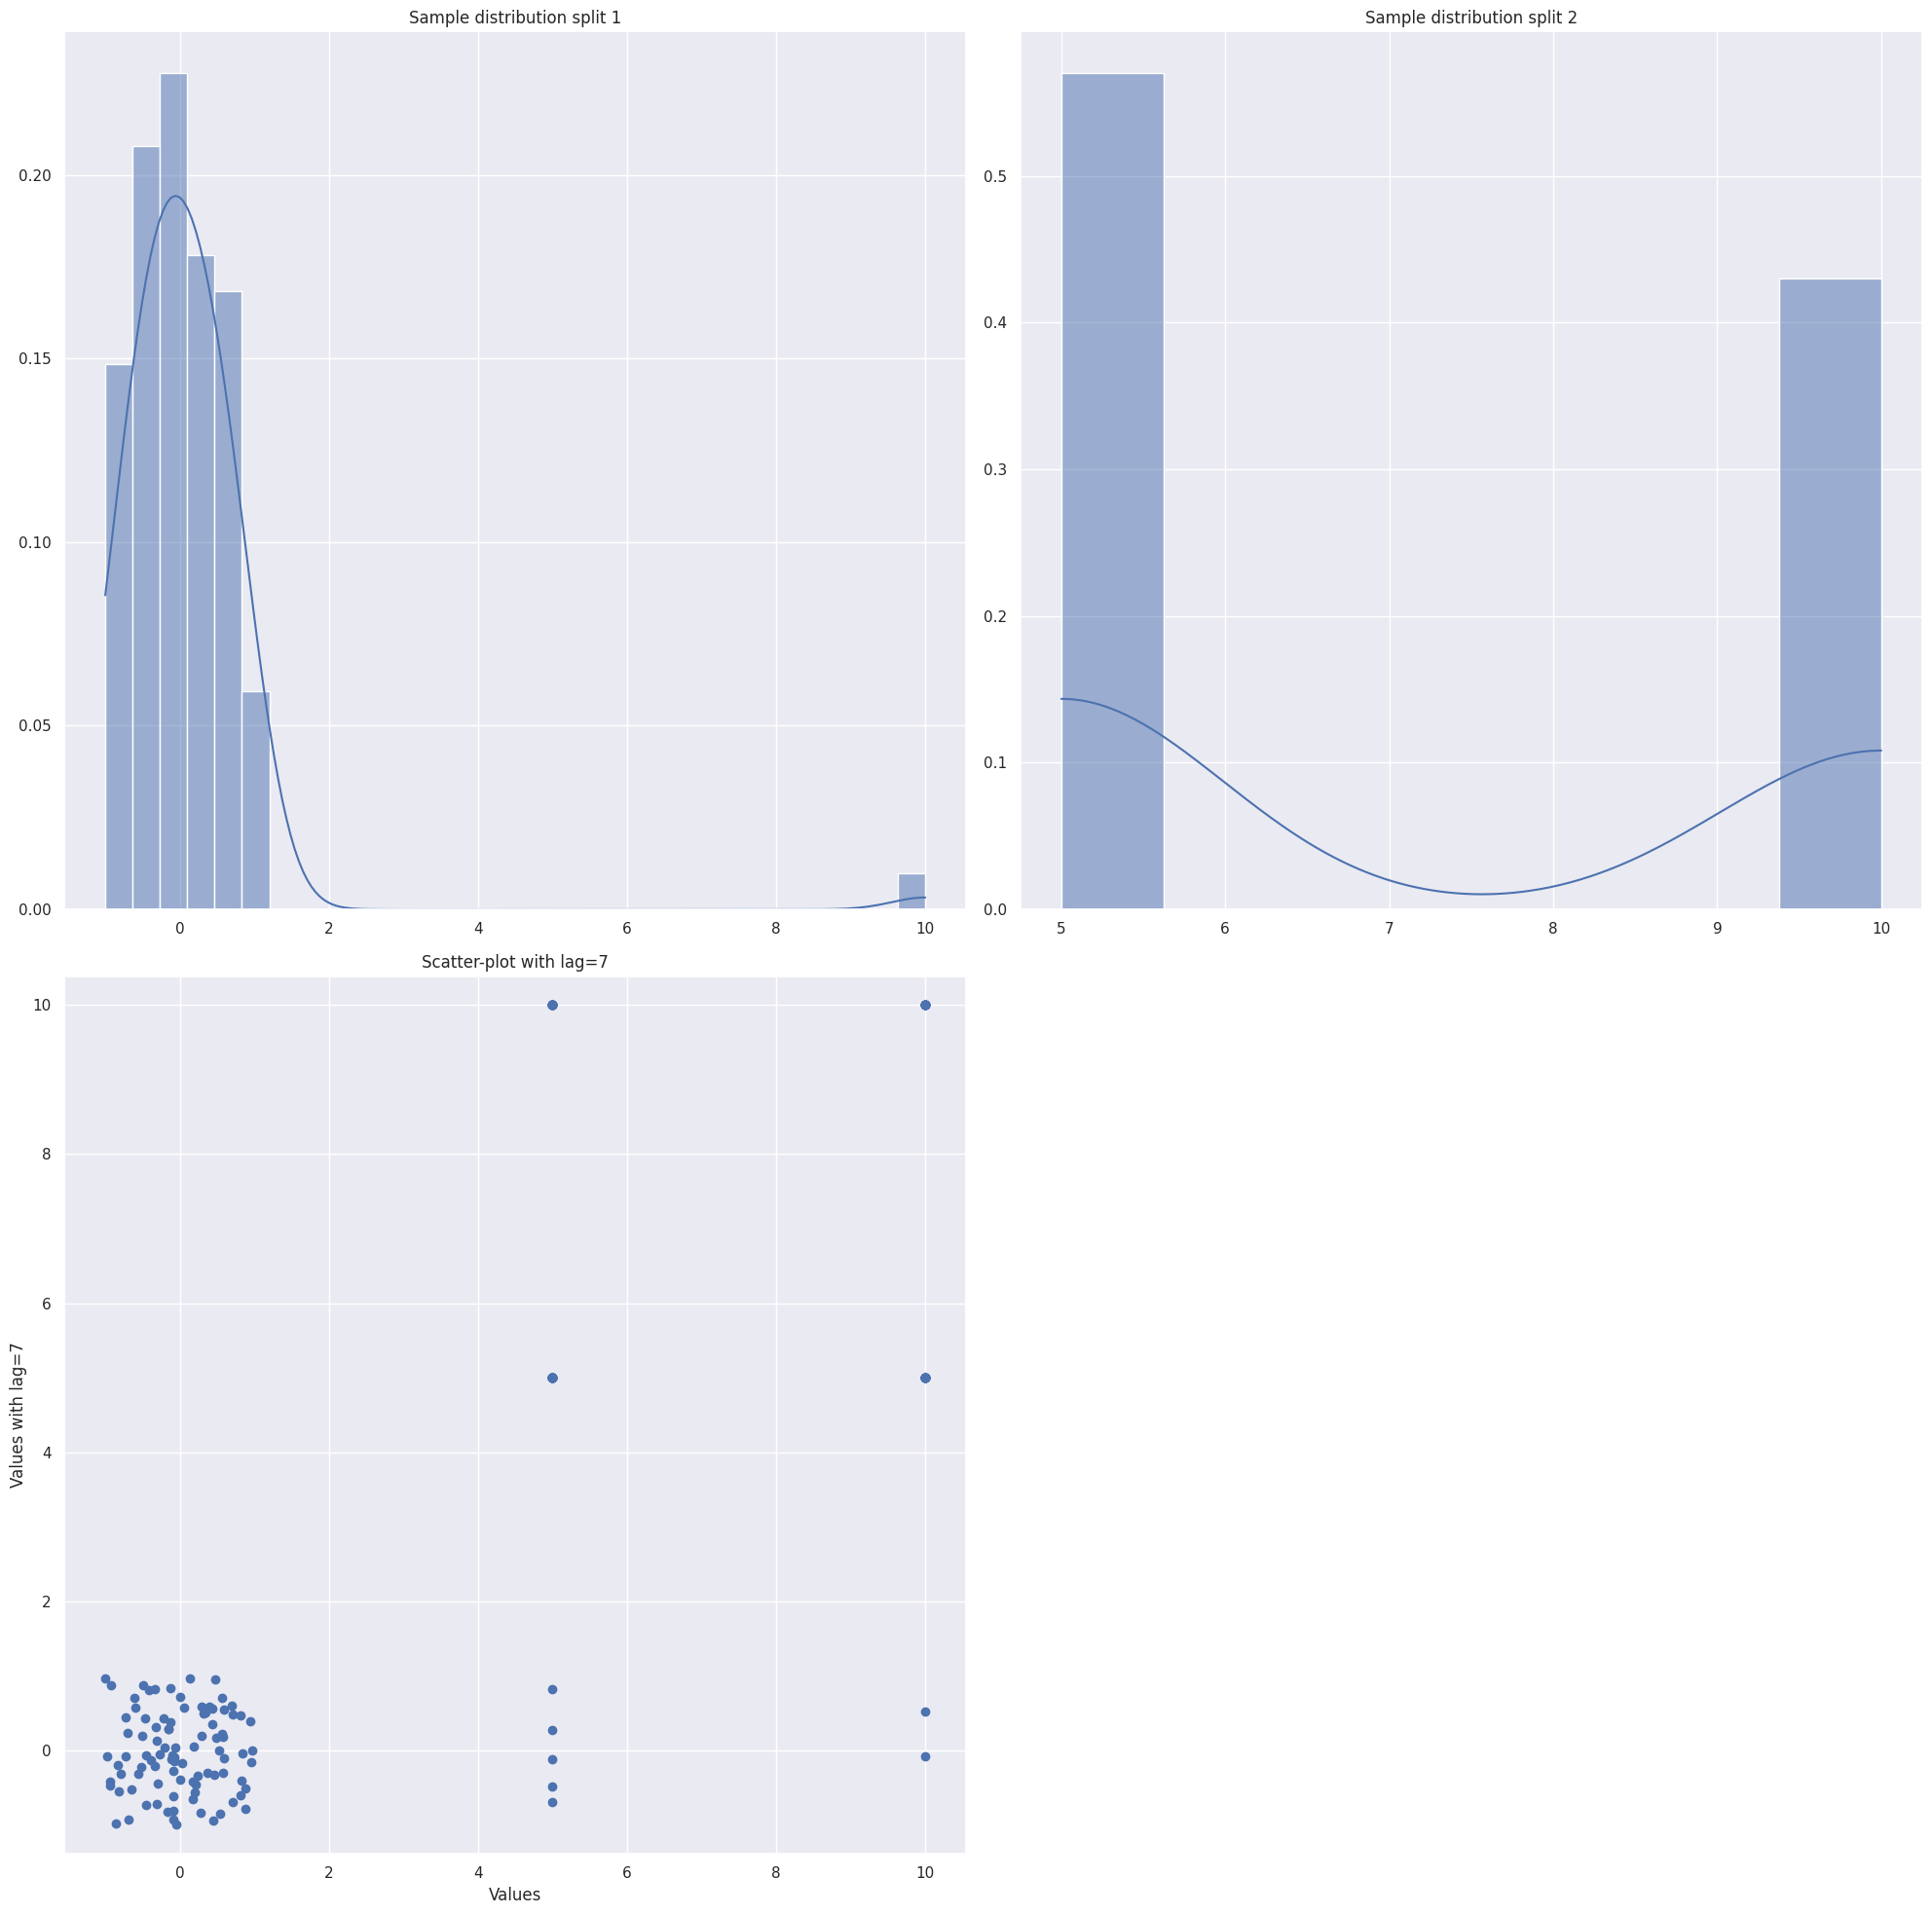

In [6]:
# Set inputs.
srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7
# TODO(Dan): Remove after integration with `cmamp`. Changes from Cm #4722 are not in `sorrentum` yet.
figsize = (20, 20)
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_timeseries_distribution()`

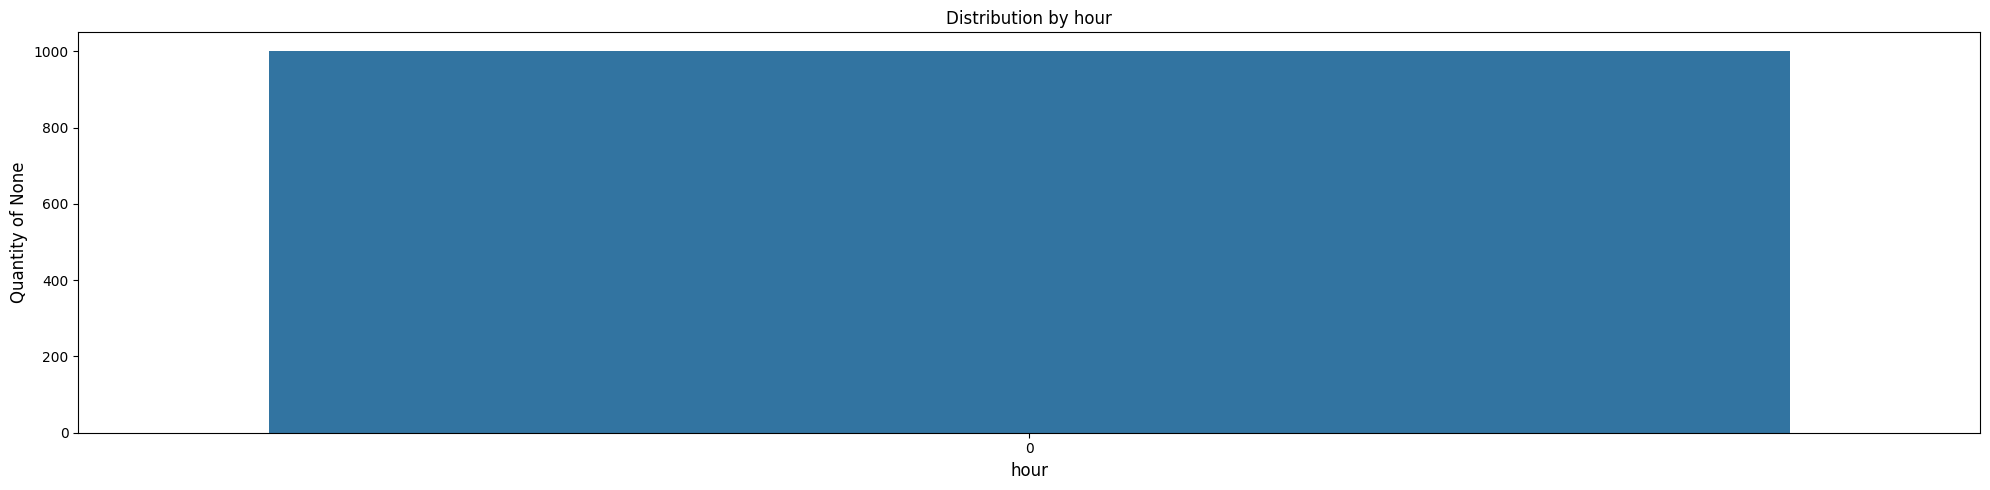

In [2]:
# Set inputs for hour interval.
srs = cptetepl.Test_plot_timeseries_distribution.get_plot_timeseries_distribution1("H")
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

2023-01-01 00:00:00    0.125730
2023-01-01 01:00:00   -0.132105
2023-01-01 02:00:00    0.640423
2023-01-01 03:00:00    0.104900
2023-01-01 04:00:00   -0.535669
                         ...   
2023-02-11 11:00:00    1.882338
2023-02-11 12:00:00   -0.540773
2023-02-11 13:00:00    1.389972
2023-02-11 14:00:00   -0.664342
2023-02-11 15:00:00   -0.229971
Freq: H, Length: 1000, dtype: float64

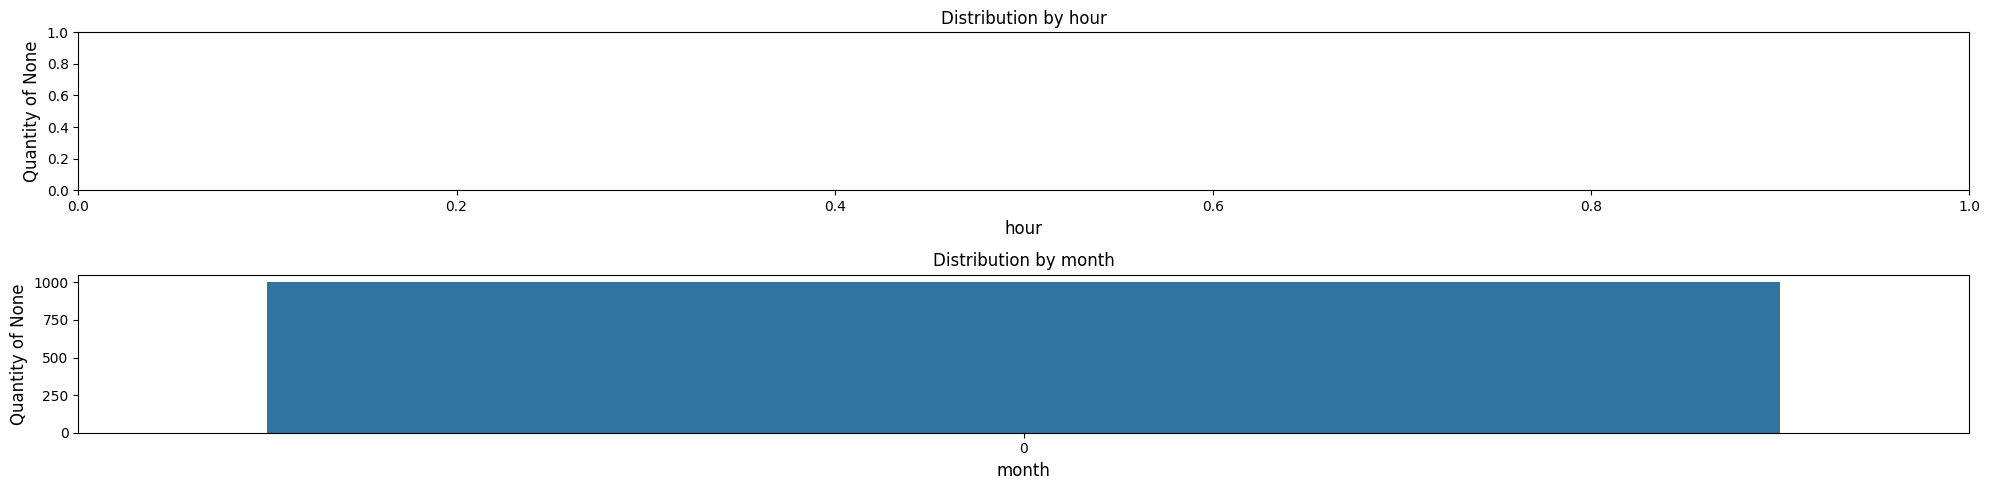

In [16]:
# Set input for month interval.
srs1 = cptetepl.Test_plot_timeseries_distribution.get_plot_timeseries_distribution1("H")
datetime_types1 = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(srs1, datetime_types1)

## `plot_time_series_by_period()`

In [7]:
# Set inputs.
test_series = cptetepl.Test_plots.get_plot_time_series_by_period1()

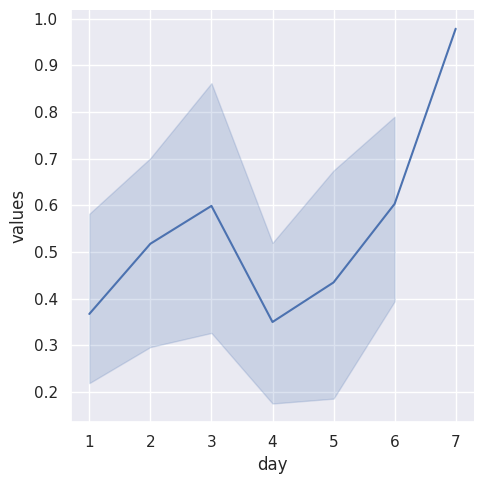

In [8]:
period = "day"
cplmiplo.plot_time_series_by_period(test_series, period)

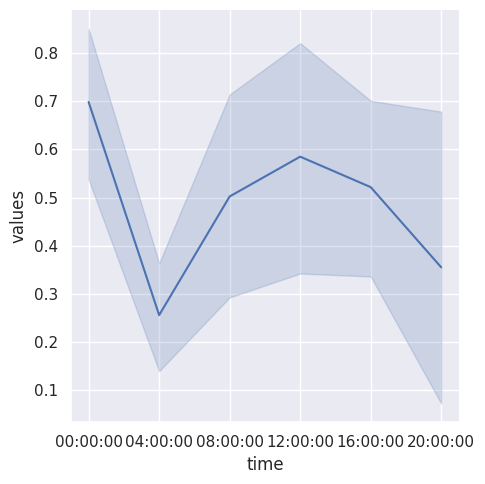

In [9]:
period = "time"
cplmiplo.plot_time_series_by_period(test_series, period)

## `plot_heatmap()`

/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


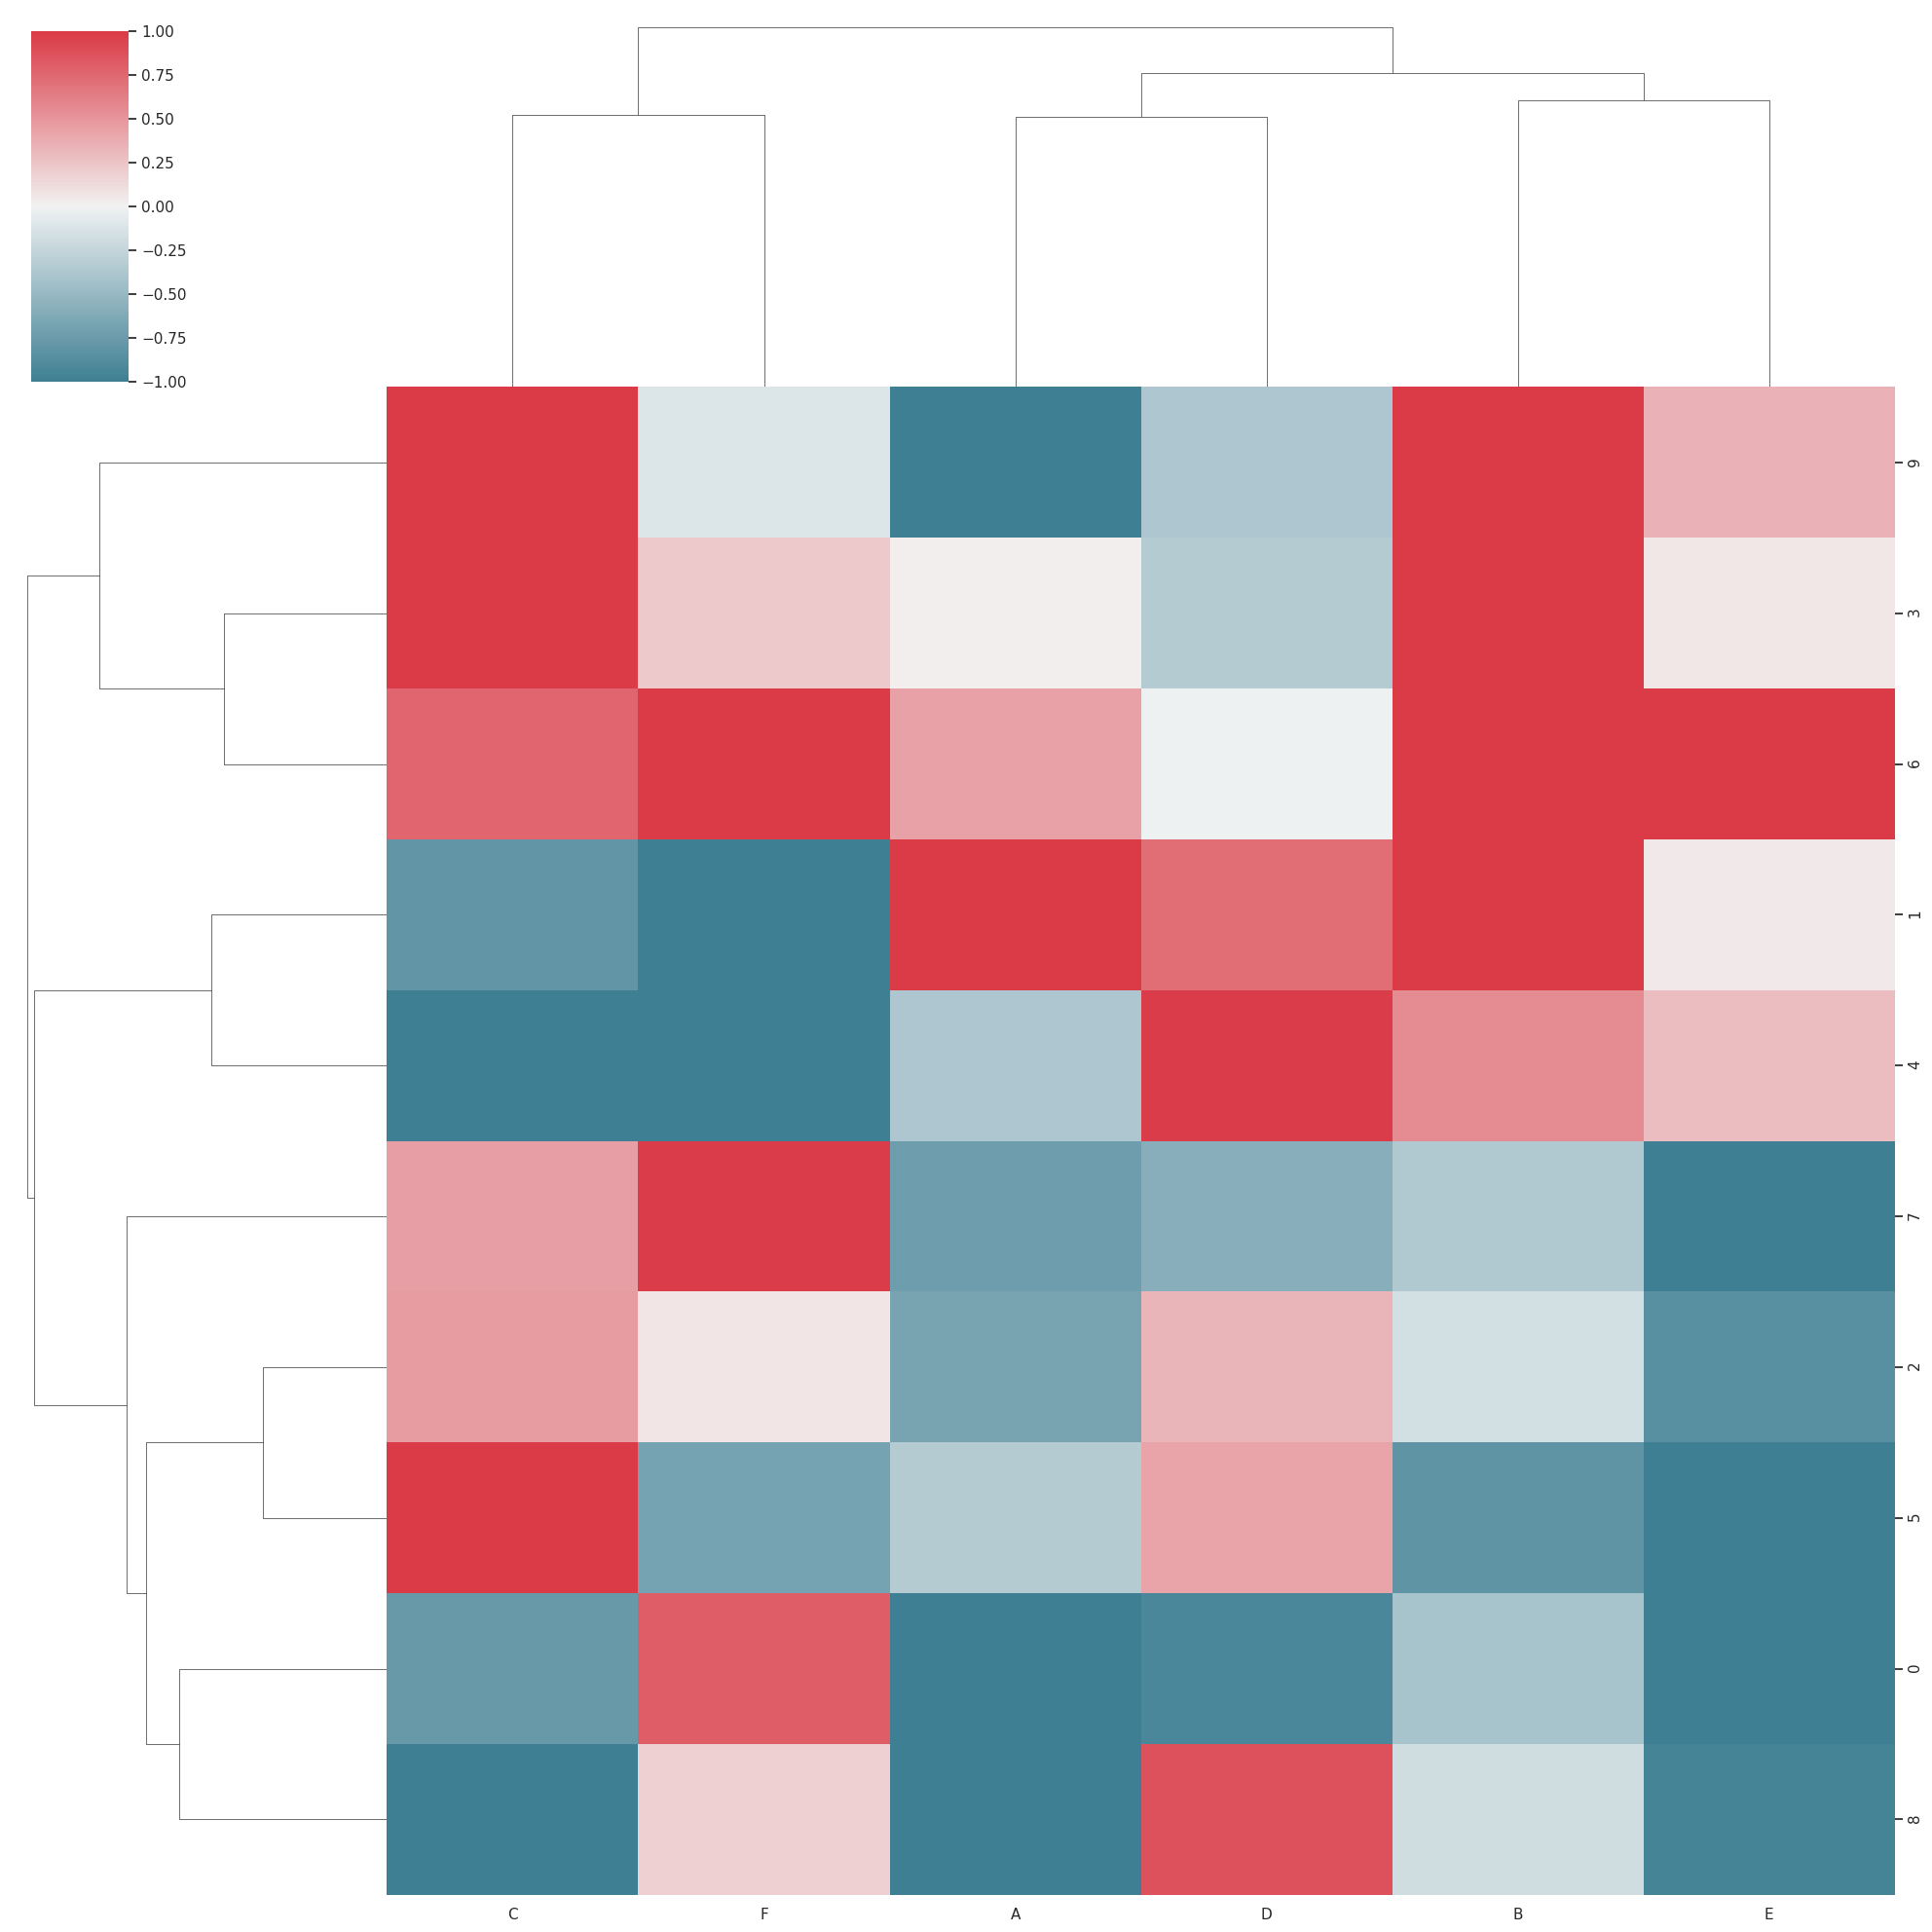

In [12]:
mode = "clustermap"
corr_df = cptetepl.Test_plots.get_plot_heatmap()
figsize = (20, 20)
cplocorr.plot_heatmap(corr_df, mode, figsize=figsize)